#### Sankalp Sandeep Indish
#### BEB75
#### Batch: B4
#### **Title:** Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.

# About the dataset
### Description:
- The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily.
- Now it becomes really important to manage their data properly to come up with new business ideas to get best results. -
- Eventually, it becomes really important to estimate the fare prices accurately.

### The datset contains the following fields:
- key - a unique identifier for each trip
- fare_amount - the cost of each trip in usd
- pickup_datetime - date and time when the meter was engaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
# importing the data
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [50]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [51]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [53]:
df.value_counts().sum()

np.int64(199999)

In [54]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [55]:
df.dropna()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
# At this point we have cleaned the dataset: removed null values and checked duplicates
# Let us process: outliers, and remove un-necessary columns

In [58]:
df = df.drop('Unnamed: 0', axis=1)

In [59]:
df['dropoff_longitude'].dropna()

,dropoff_longitude
0,-73.999512
1,-73.994710
2,-73.962565
3,-73.965316
4,-73.973082
...,...
199995,-73.986525
199996,-74.006672
199997,-73.858957
199998,-73.983215


In [60]:
df['dropoff_latitude'].dropna()

,dropoff_latitude
0,40.723217
1,40.750325
2,40.772647
3,40.803349
4,40.761247
...,...
199995,40.740297
199996,40.739620
199997,40.692588
199998,40.695415


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [62]:
df = df.dropna()

In [63]:
# At this point we have cleaned the dataset: removed null values and checked duplicates
# Let us process: outliers, and remove un-necessary columns

In [64]:
df = pd.DataFrame(df)

In [65]:
df['Date'] = df['key'].str.split(" ", expand=True)[0]

In [66]:
df['Time'] = df['key'].str.split(" ", expand=True)[1]

In [67]:
df['Unique'] = df['Time'].str.split(".", expand=True)[1]

In [68]:
df['TimeMain'] = df['Time'].str.split(".", expand=True)[0]

In [69]:
df = df.drop('key',axis=1)

In [70]:
df = df.drop('Time',axis=1)

In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
# We observe that in the pickup_datetime, we have same date and time as the ones we created recently
# So let us rename the columns and delete pickup_datetime column

In [73]:
df = df.drop('pickup_datetime', axis=1)
df = df.rename(columns={'Date': 'pickup_date', 'TimeMain':'pickup_time'})

In [74]:
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

#### We should know the following things about UBER [from research]
- Higher Prices Hours:6-9 AM and 4-6 PM, after work, and on .
- Lowest prices Days: Tuesday, Wednesday and Thursday
- Highest prices Days:Friday and Saturday nights
- Low-High prices: Monday, Sunday and other off peak times

In [75]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,Unique,pickup_time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,0000003,19:52:06
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,0000002,20:04:56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,00000061,21:45:00
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,0000001,08:22:21
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,000000188,17:47:00


In [76]:
df['pickup_time'] = pd.to_datetime(df['pickup_time'])

In [77]:
df['pickup_day_name'] = df['pickup_date'].dt.day_name() # e.g., 'Thursday'

In [78]:
df.head(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,Unique,pickup_time,pickup_day_name
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,0000003,2025-07-20 19:52:06,Thursday
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,0000002,2025-07-20 20:04:56,Friday


In [79]:
df['pickup_month_number'] = df['pickup_date'].dt.month   # e.g., 5 for May
df['pickup_year'] = df['pickup_date'].dt.year           # e.g., 2015

In [80]:
df['pickup_time'] = pd.to_datetime(df['pickup_time'], errors='coerce')

# Extract 'hour' and 'minute' from 'pickup_time'
df['pickup_hour'] = df['pickup_time'].dt.hour
df['pickup_minute'] = df['pickup_time'].dt.minute

In [81]:
df['Unique'] = df['Unique'].astype(int)

In [82]:
# We have extracted the required information at this point, let us delete the other columns
df = df.drop(['pickup_date', 'pickup_time'], axis=1)
df.to_csv("processed_dataset.csv", index=False)

In [83]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Unique,pickup_day_name,pickup_month_number,pickup_year,pickup_hour,pickup_minute
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,Thursday,5,2015,19,52
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2,Friday,7,2009,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,61,Monday,8,2009,21,45
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1,Friday,6,2009,8,22
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,188,Thursday,8,2014,17,47


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fare_amount          199999 non-null  float64
 1   pickup_longitude     199999 non-null  float64
 2   pickup_latitude      199999 non-null  float64
 3   dropoff_longitude    199999 non-null  float64
 4   dropoff_latitude     199999 non-null  float64
 5   passenger_count      199999 non-null  int64  
 6   Unique               199999 non-null  int64  
 7   pickup_day_name      199999 non-null  object 
 8   pickup_month_number  199999 non-null  int32  
 9   pickup_year          199999 non-null  int32  
 10  pickup_hour          199999 non-null  int32  
 11  pickup_minute        199999 non-null  int32  
dtypes: float64(5), int32(4), int64(2), object(1)
memory usage: 16.8+ MB


### Corrections made so far
- Removed null value rows as count was < 1% of the data
- Checked for duplicated values
- Renamed the columns
- Created new columns [pickup hour, minute, day, month, year]
- We also removed excessive 0 trailing and preceding from the unique
- We also type casted unique
- We also converted objects to int/float depending on requirements

### Next tasks
- Check for outliers using boxplot and manual min, max
- Replace outliers with appropriate values, or if value counts are less, then remove outlier row data
- Check if I can conver the latitude and longitude values to actual locations
- Find trend in data and note the observations
- Derive correlation matrix
- Remove the columns that dont have much correlation
- Encode the day values to feed the model
- Train test split the model
- Fit linear regression and random forest algorithms
- Find evaluation metrics

In [85]:
# Since geo coding will take a lot of time due to large amount of records
# so we'll skip that part


#### 2) Identifying outliers

In [86]:
# But before that, we will convert our object column to
# numeric

# Map day names to numbers (Monday=0, Sunday=6)
day_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

df['pickup_day_number'] = df['pickup_day_name'].map(day_mapping)


In [87]:
df['pickup_day_number'].nunique()

7

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fare_amount          199999 non-null  float64
 1   pickup_longitude     199999 non-null  float64
 2   pickup_latitude      199999 non-null  float64
 3   dropoff_longitude    199999 non-null  float64
 4   dropoff_latitude     199999 non-null  float64
 5   passenger_count      199999 non-null  int64  
 6   Unique               199999 non-null  int64  
 7   pickup_day_name      199999 non-null  object 
 8   pickup_month_number  199999 non-null  int32  
 9   pickup_year          199999 non-null  int32  
 10  pickup_hour          199999 non-null  int32  
 11  pickup_minute        199999 non-null  int32  
 12  pickup_day_number    199999 non-null  int64  
dtypes: float64(5), int32(4), int64(3), object(1)
memory usage: 18.3+ MB


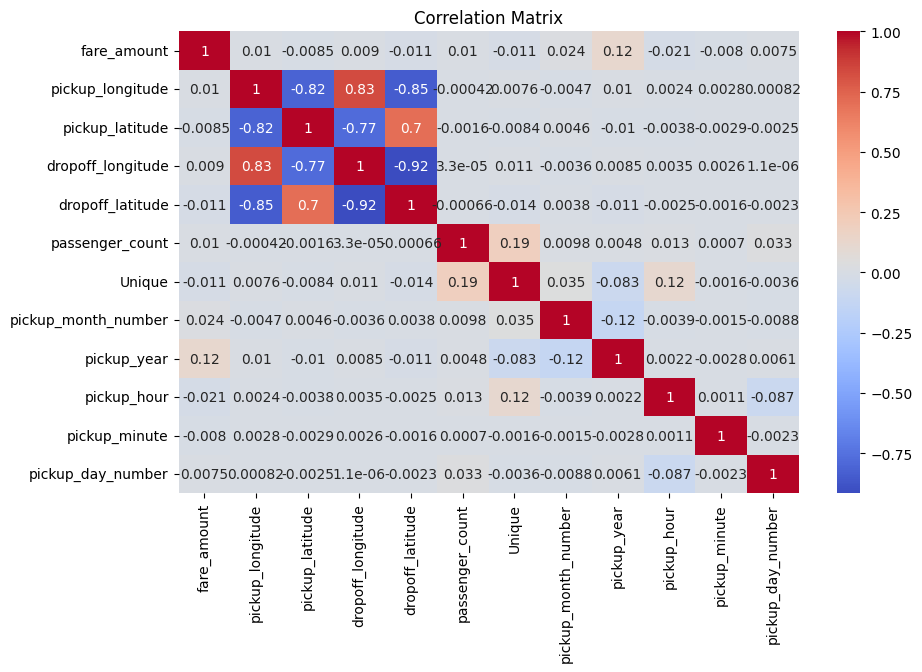

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('pickup_day_name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [92]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Unique',
       'pickup_day_name', 'pickup_month_number', 'pickup_year', 'pickup_hour',
       'pickup_minute', 'pickup_day_number'],
      dtype='object')

In [93]:
df.drop('pickup_day_name', axis=1).corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Unique,pickup_month_number,pickup_year,pickup_hour,pickup_minute,pickup_day_number
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158,-0.011234,0.023813,0.118331,-0.021463,-0.008043,0.007508
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415,0.007554,-0.004665,0.009966,0.002432,0.002782,0.000825
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559,-0.008401,0.004625,-0.010234,-0.003821,-0.002920,-0.002454
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033,0.010757,-0.003605,0.008467,0.003478,0.002557,0.000001
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.014492,0.003818,-0.011239,-0.002544,-0.001620,-0.002335
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000,0.193000,0.009774,0.004802,0.013187,0.000695,0.033189
Unique,-0.011234,0.007554,-0.008401,0.010757,-0.014492,0.193000,1.000000,0.034765,-0.083142,0.116235,-0.001625,-0.003552
pickup_month_number,0.023813,-0.004665,0.004625,-0.003605,0.003818,0.009774,0.034765,1.000000,-0.115860,-0.003924,-0.001486,-0.008785
pickup_year,0.118331,0.009966,-0.010234,0.008467,-0.011239,0.004802,-0.083142,-0.115860,1.000000,0.002162,-0.002809,0.006116
pickup_hour,-0.021463,0.002432,-0.003821,0.003478,-0.002544,0.013187,0.116235,-0.003924,0.002162,1.000000,0.001148,-0.086956


#### Train-test split and feature building

In [94]:
from sklearn.model_selection import train_test_split

# Feature matrix (X) and target vector (y)
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'pickup_hour', 'pickup_day_number', 'pickup_month_number', 'pickup_year']
X = df[features]
y = df['fare_amount']

# Split data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name}:\nR² Score = {r2:.4f}\nRMSE = {rmse:.4f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression:
R² Score = 0.0167
RMSE = 10.1135

Random Forest:
R² Score = 0.7190
RMSE = 5.4068



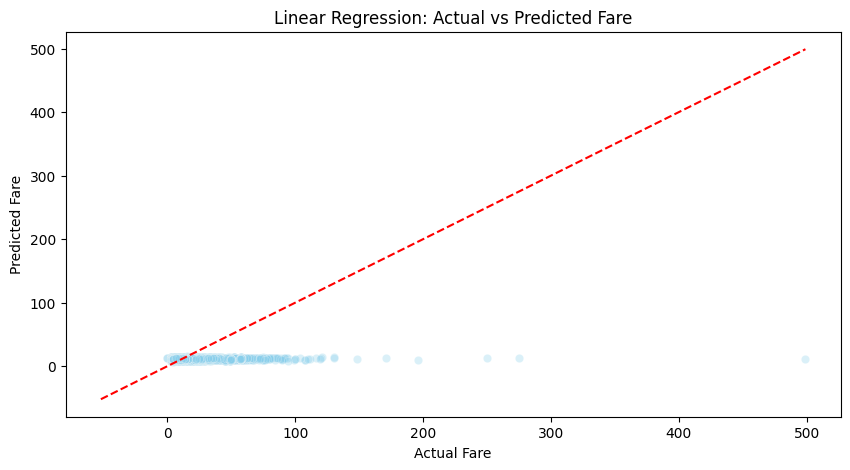

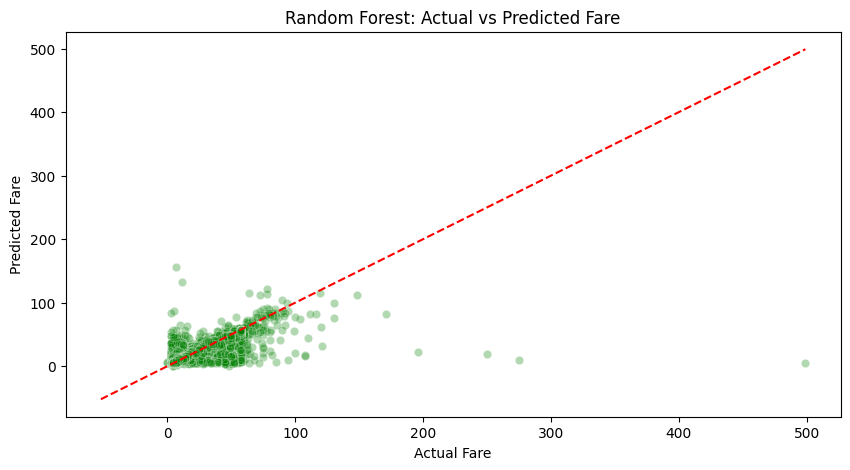

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visual comparison for Linear Regression
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.3, color="skyblue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal prediction line
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Linear Regression: Actual vs Predicted Fare")
plt.show()

# Visual comparison for Random Forest
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3, color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Random Forest: Actual vs Predicted Fare")
plt.show()

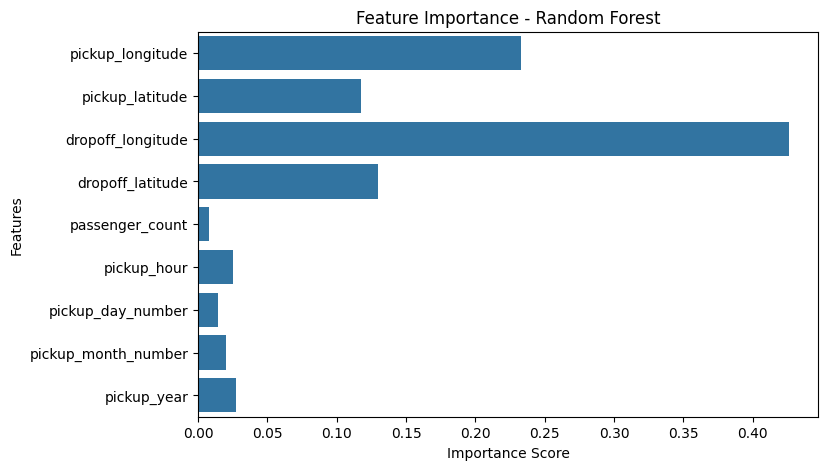

In [99]:
# Feature Importance
importances = rf_model.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

- In this project, we predicted Uber ride fare amounts using various temporal and geographic features. Two regression models were implemented:

- Linear Regression achieved an R² score of 0.0167 and RMSE of 10.11, indicating it was not suitable for this non-linear problem.

- Random Forest Regression significantly outperformed it with an R² score of 0.7190 and RMSE of 5.41, demonstrating its ability to capture complex relationships in the data.

- This clearly shows that non-linear models like Random Forest are better suited for fare prediction tasks involving spatial and temporal variables. Further improvements can include adding distance features, optimizing hyperparameters, or trying gradient boosting models like XGBoost.

In [ ]:
# Completed